## Data Loader Tutorial

##### Get the new sorted dataset [here](https://tumde-my.sharepoint.com/:f:/g/personal/gohdennis_tum_de/EmooVZ4vE95Iic-HIP9-P10BzX7oIOBmRhK8Q9tYzfJWRQ?e=maOqo5) [08_Aug_2022]

Annotations are stored under notebooks/preprocesing/restructured_w_original_labels.json (also in the link!)

Extract the zip under data/.

Put everything under data!
```
data
├── cropped
├── restructured_w_original_labels.json
└── sort
    ├── dent
    ├── other
    ├── rim
    └── scratch
```
<hr style="height:2px;border-width:0;color:black;background-color:black">

## Importing the Data Loader

In [1]:
from pathlib import Path
import os
import json
import seaborn as sns
import numpy as np
import tensorflow as tf

import sys
sys.path.append('../../')
from src.preprocessing.data_loader import DataLoader

# from preprocessing.data_loader import DataLoader
import matplotlib.pyplot as plt

## I. Initializing Data Loader

Make sure you've ran the .env guide on README so you can import the modules properly!

In [2]:
data_loader = DataLoader(
    # json file path starting at repository entry
    json_directory=Path('data/restructured_w_original_labels.json'),
    # evaluation data set size
    val_size=0.3,
    # test data set size
    test_size=0.3,
    # perform cropping
    perf_crop=True,  # right now true is only working
    # desired image size
    image_size=[244, 244],
    # desired cropping type
    resizing_type='crop',
    # batch size
    batch_size=30,
    # not implemented yet
    class_weights=[0.3980, 0.0625, 0.2954, 0.2441],
    # output data type
    data_type=tf.data.Dataset)

## II. Load the Data

In [3]:
train_ds, test_ds, eval_ds = data_loader.run()

For plotting let's set some variables

In [4]:
with Path('../../data/restructured_w_original_labels.json').open() as f:
    data = json.load(f)
categories = data['categories']
annotations = data = data['annotations']
print(f"#categories: {len(categories)}")
print(f"#annotations: {len(annotations)}")
print(f'Classes: {[x["name"] for x in categories]}')

#categories: 4
#annotations: 897
Classes: ['dent', 'other', 'rim', 'scratch']


## III. Plotting

Plot the training set

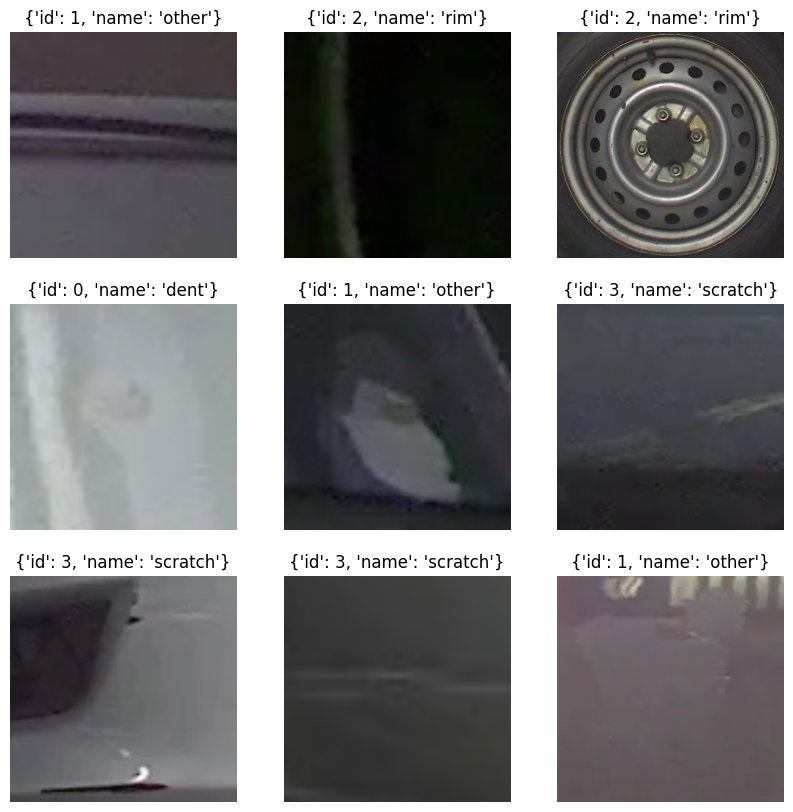

In [5]:
plt.figure(figsize=(10, 10))
for image, label in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(categories[label[i]])
        plt.axis("off")

Plot the validation set

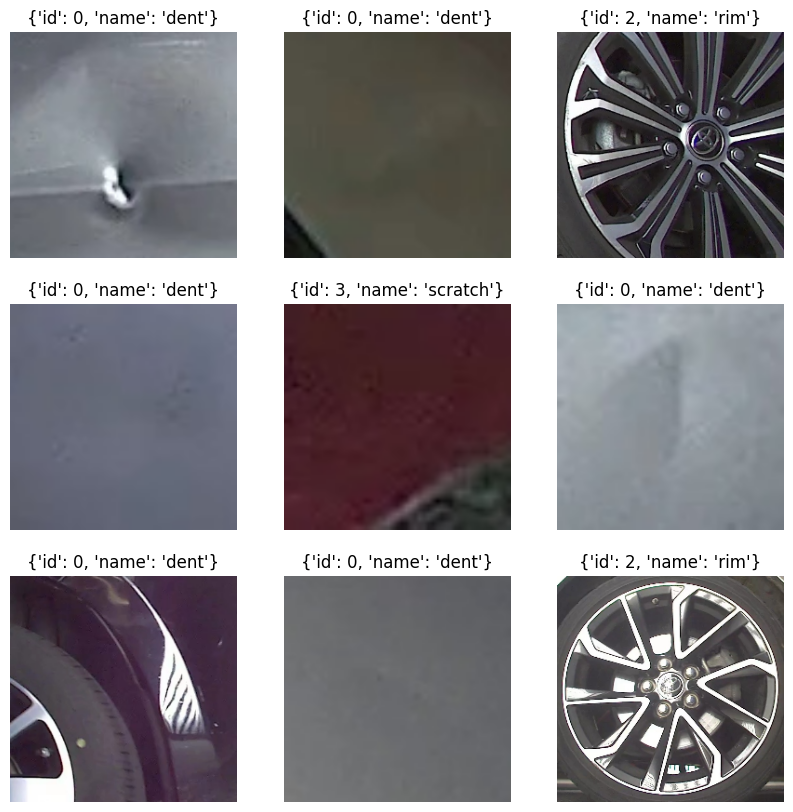

In [6]:
plt.figure(figsize=(10, 10))
for image, label in eval_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(categories[label[i]])
        plt.axis("off")

Plot the test set

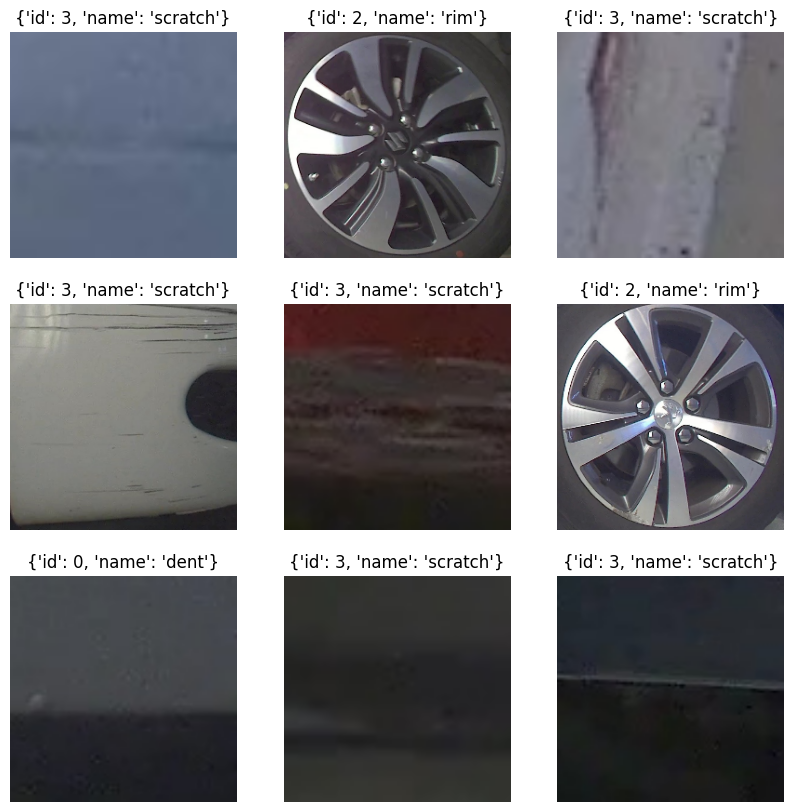

In [7]:
plt.figure(figsize=(10, 10))
for image, label in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(categories[label[i]])
        plt.axis("off")

## III. Distributions

train_ds has 356 images
test_ds has 272 images
eval_ds has 267 images
total : 895 images


(array([ 65.,  16.,  79., 107.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

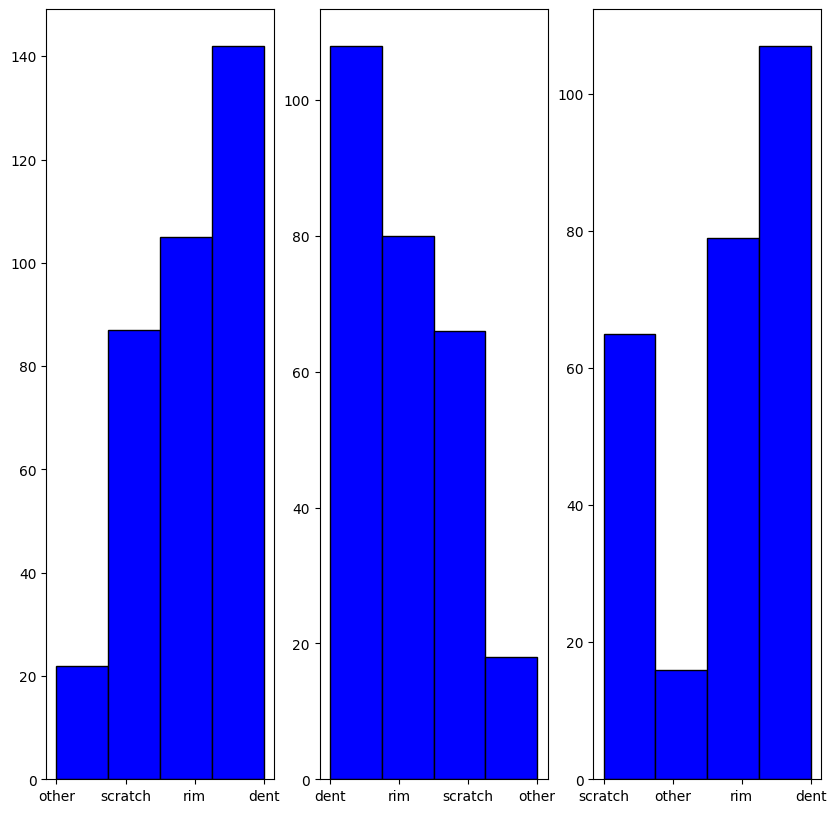

In [8]:
# get area size for all individual crops
labels_train = np.concatenate([y for x, y in train_ds], axis=0)
labels_test = np.concatenate([y for x, y in test_ds], axis=0)
labels_eval = np.concatenate([y for x, y in eval_ds], axis=0)
nl_train = []
nl_test = []
nl_eval = []

for label in labels_train:
    nl_train.append(categories[label]['name'])
    
for label in labels_test:
    nl_test.append(categories[label]['name'])    

for label in labels_eval:
    nl_eval.append(categories[label]['name'])
    
print(f"train_ds has {len(labels_train)} images")
print(f"test_ds has {len(labels_test)} images")
print(f"eval_ds has {len(labels_eval)} images")
print(f"total : {len(labels_eval) + len(labels_train) + len(labels_test)} images")
# plot distribution

plt.figure(figsize=(10, 10))
plt.subplot(1,3,1)
plt.hist(nl_train, color='blue', edgecolor='black', bins=4)

plt.subplot(1,3,2)
plt.hist(nl_test, color='blue', edgecolor='black', bins=4)

plt.subplot(1,3,3)
plt.hist(nl_eval, color='blue', edgecolor='black', bins=4)

